In [1]:
#импорт библиотеки pandas
import pandas as pd
from datetime import datetime, timedelta
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла  данных
df = pd.read_csv(r'C:\Users\nasti\Downloads\df_camp.csv', encoding='cp1251') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52724 non-null  object 
 1   source              52724 non-null  object 
 2   medium              52724 non-null  object 
 3   delivery_available  52724 non-null  object 
 4   device_type         52724 non-null  object 
 5   promo_activated     52724 non-null  object 
 6   filter_used         52724 non-null  object 
 7   pageviews           52724 non-null  int64  
 8   visits              52724 non-null  int64  
 9   productClick        52724 non-null  int64  
 10  addToCart           52724 non-null  int64  
 11  checkout            52724 non-null  int64  
 12  transactions        52724 non-null  int64  
 13  revenue             52724 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.6+ MB


In [4]:
# перевод даты в правильный формат
df['date'] = pd.to_datetime(df['date'])

In [5]:
#проверяем количество дубликатов
df.duplicated().sum()

0

In [6]:
df.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


**Вывод**:
Данные без пропусков и дубликатов, информация в каждой колонке соответствует своему типу дынных.

## Какой рекламный канал принёс больше всего дохода за всё время?

In [7]:
total_income = df.groupby('source')['revenue'].sum().reset_index()
total_income.sort_values(by = 'revenue', ascending = False ).head()

,source,revenue
21,yandex,4.674748e+08
12,google,4.565170e+08
0,(direct),2.384474e+08
3,admitad,6.573886e+07
9,eLama,1.643239e+07


Наибольший доход приносит yandex, далее следует google с небольшим отрывом.

## Как изменился средний чек транзакции после введения коронавирусных ограничений?

Нерабочие дни в РФ были введены с 30 марта 2020 г.

In [8]:
# средний чек
df['mean_check'] = df['revenue'] / df['transactions']

In [9]:
# данные до коронавируса
df_before = df.query('date <= "2020-03-29"')

In [10]:
# данные после коронавируса
df_after = df.query('date > "2020-03-30"')

In [11]:
#средний чек до
mean_check_before = df_before['mean_check'].mean()
mean_check_before

1286.3400186569197

In [12]:
#средний чек после
mean_check_after = df_after['mean_check'].mean()
mean_check_after

1189.735654823809

Средний чек после введения короновирусных ограничений снизился с 1286,34 у.е. до 1189,74 у.е.

##  Как средний чек изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

In [13]:
#средний чек до
mean_check_before_promo = df_before.groupby('promo_activated')['mean_check'].mean().reset_index()
mean_check_before_promo

,promo_activated,mean_check
0,no,1319.260360
1,yes,1253.925308


In [14]:
#средний чек после
mean_check_after_promo = df_after.groupby('promo_activated')['mean_check'].mean().reset_index()
mean_check_after_promo

,promo_activated,mean_check
0,no,1165.648790
1,yes,1212.288607


Средний чек для пользователей, покупающих с промокодом, после введения короновирусных ограничений снизился с 1253,93 у.е. до 1212,29 у.е.

Средний чек для пользователей, покупающих без промокодом, после введения короновирусных ограничений также снизился с 1319,26 у.е. до 1165,64 у.е.

Стоит отметить, что даже после введения ограницений средний чек с промокодом выше.

## Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

CR считаем как коэффициент конверсии в транзакцию из visits

In [15]:
df['weekday'] = df['date'].dt.dayofweek

In [16]:
df.sample(5)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,mean_check,weekday
17250,2020-06-04,google,cpc,Доставка есть,Десктоп,no,no,100,10,330,66,30,5,4517.0,903.4,3
21149,2020-01-15,opmcpa,cpa,Не определено,Мобайл,no,no,3,2,0,0,0,0,0.0,NaN,2
22476,2020-03-04,DuckDuckGo,organic,Не определено,Мобайл,no,no,4,4,0,0,0,0,0.0,NaN,2
43090,2020-05-11,vk,social,Не определено,Мобайл,yes,no,26,7,80,16,8,1,999.0,999.0,0
22632,2020-09-16,admitad,cpa,Доставки нет,Мобайл,yes,no,4,1,0,0,4,0,0.0,NaN,2


In [17]:
# Считаем CR
df['cr'] = df['transactions'] / df['visits']

Будем проверять гипотезу о равенстве средних двух генеральных совокупностей

Нулевая гипотеза  - средний CR в будние дний и выходные равны.  
Альтернативная гипотеза - средний CR в будние дний и выходные не равны.  
Пороговое значение alpha - 0,05

In [18]:
# будни
weekday = [0,1,2,3,4]
# выходные
weekends = [5,6]


In [19]:
#выделяем отдельно будние и выходные из общей выборки
df_weekday = df.query('weekday in @weekday')
df_weekends = df.query('weekday in @weekends')

# значения cr в будни
df_weekday_cr = df_weekday['cr']

# значения cr в выходные
df_weekends_cr = df_weekends['cr']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

# дисперсии выборок не равны
results = st.ttest_ind(df_weekday_cr, df_weekends_cr, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.365213081619752e-11
Отвергаем нулевую гипотезу


С высокой долей вероятности средний коэффициент конверсии в транзакцию в выходные и будние дни различается. 

## Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед. 
Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам понадобятся?


In [20]:
df['month'] = df['date'].dt.month 

In [21]:
incom_cpc = df.query('medium == "cpc"')

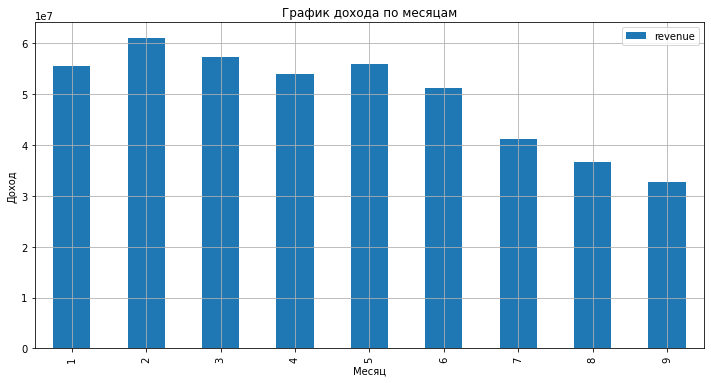

In [22]:
#сводная таблица доход по времени
incom_per_date = (incom_cpc
                  .pivot_table(index='month', values='revenue', aggfunc='sum')
                  .plot(y='revenue', kind='bar', grid=True, figsize=(12, 6))
                 )
plt.title("График дохода по месяцам") 
plt.xlabel("Месяц")
plt.ylabel("Доход") 
plt.show()

Очень сложно спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой, только по 2020 году, так как в это время было много внешних факторов. Если судить по данным только 2020 года, мы видим что доход от месяца к месяцу продолжает снижаться. К тому же у нас нет данных за полный календарный год, а только за 9 месяцев.
Хотелось бы изучить данные за предыдущие периоды.